<a href="https://www.kaggle.com/code/rubanzasilva/eda-fast-ai-neural-nets-gradient-boosting?scriptVersionId=254777448" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Binary Classification on a Bank Dataset 

In this competition, we are tasked with predicting whether a client will subscribe to a term deposit.

Per Investopedia, a [bank term deposit](https://www.investopedia.com/terms/t/termdeposit.asp) is a bank savings product where funds are committed to a financial institution for a certain duration. Here, you agree to deposit a specific amount of money for a predetermined period of time in exchange for a guaranteed interest rate.

This interest rate is usually higher than that given on a regular savings account because you are giving up liquidity. The trade-off is simple: you sacrifice immediate access to your money in exchange for higher, guaranteed returns. Banks can offer better rates because they know exactly how long they'll have your funds to lend out to other customers.

## Library & Data Import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e8/sample_submission.csv
/kaggle/input/playground-series-s5e8/train.csv
/kaggle/input/playground-series-s5e8/test.csv


In [2]:
%%time
%pip install catboost
%pip install optuna
#%pip install optuna_distributed
#%pip install openfe
%pip install seaborn
%pip install xgboost
%pip install lightgbm
%pip install fastkaggle
#%pip install h2o
%pip install -Uqq fastbook
#%pip install polars
%pip install -q -U autogluon.tabular
%pip install autogluon
%pip install --upgrade pip
%pip install tqdm
#%pip install wandb
#%pip install sweetviz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

The latest version of AutoGluon appears to have a compatibility issue with the latest versions of NumPy, so for now, I will downgrade NumPy to a known working version.

In [3]:
#%pip install -U autogluon > /dev/null
# In your terminal/command prompt
#pip install numpy==1.24.3
# or
%pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 126.8 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
autogluon-core 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-tabular 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-multimodal 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-common 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-features 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm

#import fastbook
#fastbook.setup_book()
#from fastbook import *
from fastai.tabular.all import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm
from ipywidgets import interact

from fastai.imports import *
np.set_printoptions(linewidth=130)


from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,StratifiedKFold, cross_val_score,train_test_split,GridSearchCV


from pathlib import Path
import os

import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier,CatBoostRegressor,Pool, metrics, cv


import warnings


#from openfe import OpenFE, transform
from autogluon.tabular import TabularDataset, TabularPredictor

#import h2o
#from h2o.automl import H2OAutoML

import gc

import optuna
from optuna.samplers import TPESampler

import pickle
from joblib import dump, load
#import sweetviz as sv
#from IPython.display import FileLink

#import h2o
#from h2o.automl import H2OAutoML

In [5]:
path = Path('/kaggle/input/playground-series-s5e8/')
path

Path('/kaggle/input/playground-series-s5e8')

In [6]:
train_df = pd.read_csv(path/'train.csv',index_col='id')
test_df = pd.read_csv(path/'test.csv',index_col='id')
sub_df = pd.read_csv(path/'sample_submission.csv')

In [7]:
train_df.shape

(750000, 17)

## Exploratory Data Analysis

In [8]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        750000 non-null  int64 
 1   job        750000 non-null  object
 2   marital    750000 non-null  object
 3   education  750000 non-null  object
 4   default    750000 non-null  object
 5   balance    750000 non-null  int64 
 6   housing    750000 non-null  object
 7   loan       750000 non-null  object
 8   contact    750000 non-null  object
 9   day        750000 non-null  int64 
 10  month      750000 non-null  object
 11  duration   750000 non-null  int64 
 12  campaign   750000 non-null  int64 
 13  pdays      750000 non-null  int64 
 14  previous   750000 non-null  int64 
 15  poutcome   750000 non-null  object
 16  y          750000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 103.0+ MB


In [10]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [11]:
missing_values_count = train_df.isnull().sum()
sorted_missing_values = missing_values_count.sort_values(ascending=False)
print(sorted_missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [12]:
#Missing values returned as percentages.
missing_percentages = train_df.isnull().mean() * 100
sorted_missing_percentages = missing_percentages.sort_values(ascending=False)
print(sorted_missing_percentages)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64


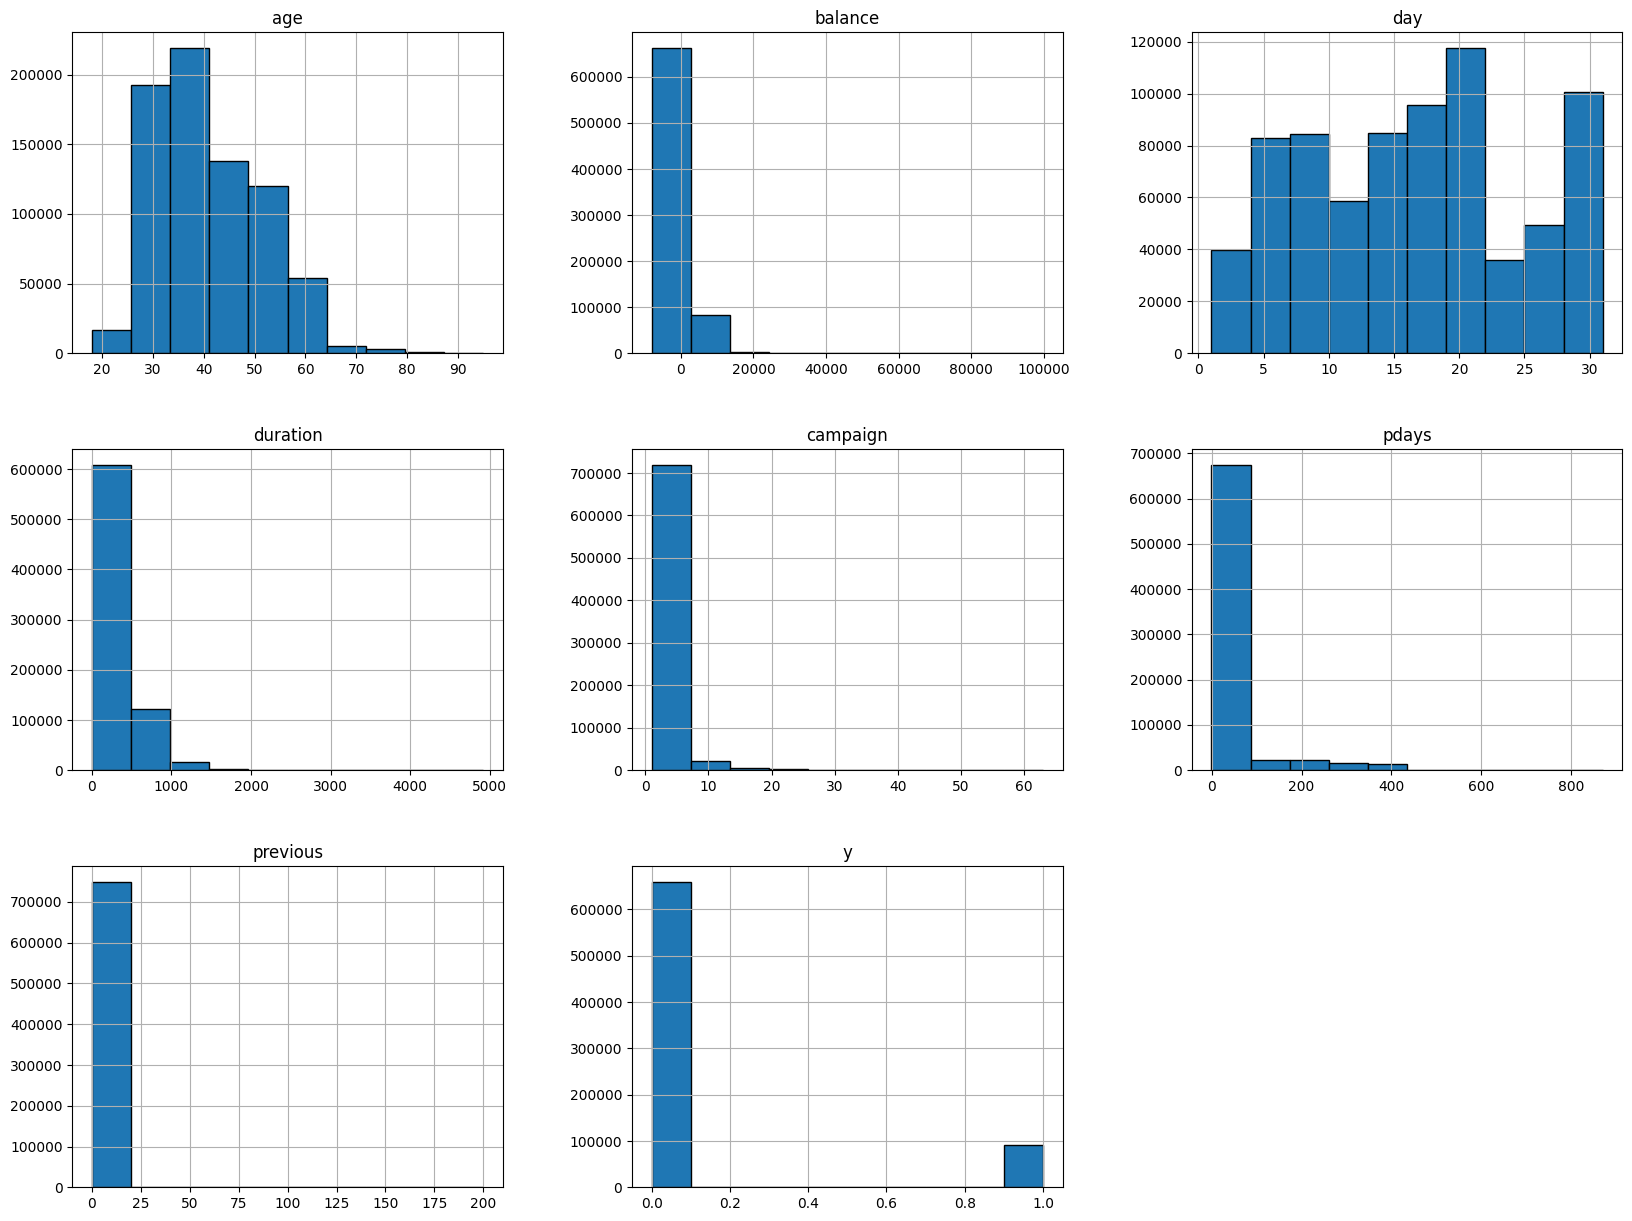

In [13]:
train_df.hist(figsize=(20,15),edgecolor='black');

In [14]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,750000.0,40.926395,10.098829,18.0,33.0,39.0,48.0,95.0
balance,750000.0,1204.067397,2836.096759,-8019.0,0.0,634.0,1390.0,99717.0
day,750000.0,16.117209,8.250832,1.0,9.0,17.0,21.0,31.0
duration,750000.0,256.229144,272.555662,1.0,91.0,133.0,361.0,4918.0
campaign,750000.0,2.577008,2.718514,1.0,1.0,2.0,3.0,63.0
pdays,750000.0,22.412733,77.319998,-1.0,-1.0,-1.0,-1.0,871.0
previous,750000.0,0.298545,1.335926,0.0,0.0,0.0,0.0,200.0
y,750000.0,0.120651,0.325721,0.0,0.0,0.0,0.0,1.0


## Prepare Data for training

In [15]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))

In [16]:
#train_df = pd.concat([train_df, original_df], ignore_index=True)

In [17]:
cont_names,cat_names = cont_cat_split(train_df, dep_var='y')
#splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))
to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
#to = TabularPandas(train_df, procs=[Categorify,Normalize],
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names='y',
                   y_block=CategoryBlock(),
                   splits=splits)
dls = to.dataloaders(bs=64)
#dls = to.dataloaders(bs=1024)
test_dl = dls.test_dl(test_df)

X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

In [18]:
cont_names,len(cont_names)

(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], 7)

In [19]:
cat_names, len(cat_names)

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome'],
 9)

In [20]:
X_train

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
id,,,,,,,,,,,,,,,,
626280,10,3,3,1,1,1,1,10,4,-0.586023,-0.097714,0.106955,2.589238,-0.579035,-0.302341,-0.221702
137404,2,2,3,1,2,1,1,1,4,-0.883076,-0.112895,0.470509,-0.605311,-0.212147,-0.302341,-0.221702
395595,5,3,3,1,1,1,1,7,4,-1.774236,-0.285531,-0.135413,1.395872,-0.579035,-0.302341,-0.221702
521515,6,1,2,1,1,1,3,7,4,1.592368,0.080570,0.228140,-0.910078,0.888517,-0.302341,-0.221702
371384,5,2,3,1,1,1,1,2,4,-0.487005,-0.122427,1.197615,-0.612655,5.291170,-0.302341,-0.221702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636703,2,2,1,1,2,2,1,6,4,0.602190,-0.428511,-0.135413,-0.384997,-0.579035,-0.302341,-0.221702
377949,5,2,3,1,1,1,1,2,4,0.899243,-0.424275,0.228140,-0.553904,0.521629,-0.302341,-0.221702
3545,1,3,2,1,2,1,3,9,4,-0.288970,0.060447,1.318799,-0.465779,-0.579035,-0.302341,-0.221702


Below we define a function to help us do stratified kfold cross validation which we use below

In [21]:
def cross_val_predict(model, X_train, y_train, X_test, n_splits=5, random_state=42, 
                       return_proba=True, scoring='roc_auc', verbose=True):
    """
    Generic cross-validation function that works with ANY sklearn-compatible model.
    
    Parameters:
    - model: INSTANTIATED model object (e.g., xgb.XGBClassifier(n_estimators=100))
    - X_train, y_train: training data and labels
    - X_test: test data for final predictions
    - n_splits: number of CV folds
    - random_state: random seed for reproducibility
    - return_proba: if True, return probabilities; if False, return class predictions
    - scoring: metric to use ('roc_auc', 'accuracy')
    - verbose: print progress
    
    Returns:
    - oof_predictions: out-of-fold predictions on training set
    - test_predictions: predictions on test set (averaged across folds)
    - mean_score: mean score across folds
    - fold_scores: list of scores for each fold
    """
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import accuracy_score, roc_auc_score
    from sklearn.base import clone
    import numpy as np
    
    # Initialize stratified k-fold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Initialize arrays to store results
    if return_proba:
        oof_predictions = np.zeros(len(X_train))
        test_predictions = np.zeros(len(X_test))
    else:
        oof_predictions = np.zeros(len(X_train), dtype=int)
        test_predictions = np.zeros(len(X_test))
    
    fold_scores = []
    
    # Perform cross-validation
    for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train), 1):
        if verbose:
            print(f"Training fold {fold}/{n_splits}...")
        
        # Split data for current fold
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
        # Clone the model to avoid interference between folds
        model_fold = clone(model)
        
        # Train model on current fold
        model_fold.fit(X_fold_train, y_fold_train)
        
        # Get predictions based on return_proba setting
        if return_proba:
            # Get probabilities for positive class
            y_pred_proba = model_fold.predict_proba(X_fold_val)[:, 1]
            oof_predictions[val_index] = y_pred_proba
            test_predictions += model_fold.predict_proba(X_test)[:, 1] / n_splits
            
            # Calculate score
            if scoring == 'roc_auc':
                cv_score = roc_auc_score(y_fold_val, y_pred_proba)
            else:  # accuracy
                y_pred_fold = (y_pred_proba > 0.5).astype(int)
                cv_score = accuracy_score(y_fold_val, y_pred_fold)
        else:
            # Get class predictions
            y_pred_fold = model_fold.predict(X_fold_val)
            oof_predictions[val_index] = y_pred_fold
            test_predictions += model_fold.predict(X_test) / n_splits
            cv_score = accuracy_score(y_fold_val, y_pred_fold)
        
        fold_scores.append(cv_score)
        if verbose:
            print(f"Fold {fold} {scoring}: {cv_score:.6f}")
    
    # Round test predictions if using hard predictions
    if not return_proba:
        test_predictions = np.round(test_predictions).astype(int)
    
    # Calculate mean score
    mean_score = np.mean(fold_scores)
    if verbose:
        print(f"\nMean {scoring}: {mean_score:.6f}")
    
    return oof_predictions, test_predictions, mean_score, fold_scores


# =============================================================================
# USAGE EXAMPLES WITH DIFFERENT MODELS
# =============================================================================

# Example: CatBoost (if installed)
"""
cat_model = CatBoostClassifier(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    random_state=42,
    verbose=False
)

cat_oof, cat_test, cat_auc, cat_scores = cross_val_predict(
    model=cat_model,
    X_train=X_train,
    y_train=y_train, 
    X_test=X_test,
    return_proba=True,
    scoring='roc_auc'
)
"""

# =============================================================================
# ENSEMBLE ALL MODELS
# =============================================================================
"""
print("Individual Model Performance:")
print(f"XGBoost AUC: {xgb_auc:.6f}")
print(f"Random Forest AUC: {rf_auc:.6f}")
print(f"LightGBM AUC: {lgb_auc:.6f}")

# Simple ensemble
ensemble_oof = (xgb_oof + rf_oof + lgb_oof) / 3
ensemble_test = (xgb_test + rf_test + lgb_test) / 3

ensemble_auc = roc_auc_score(y_train, ensemble_oof)
print(f"\nEnsemble AUC: {ensemble_auc:.6f}")

# Create submission
submission = pd.DataFrame({
    'id': test_df.index,
    'Depression': ensemble_test
})
submission.to_csv('ensemble_submission.csv', index=False)

print(f"\nShapes:")
print(f"OOF predictions: {ensemble_oof.shape} (training data)")
print(f"Test predictions: {ensemble_test.shape} (test data)")
print("Different shapes = different datasets!")
"""

'\nprint("Individual Model Performance:")\nprint(f"XGBoost AUC: {xgb_auc:.6f}")\nprint(f"Random Forest AUC: {rf_auc:.6f}")\nprint(f"LightGBM AUC: {lgb_auc:.6f}")\n\n# Simple ensemble\nensemble_oof = (xgb_oof + rf_oof + lgb_oof) / 3\nensemble_test = (xgb_test + rf_test + lgb_test) / 3\n\nensemble_auc = roc_auc_score(y_train, ensemble_oof)\nprint(f"\nEnsemble AUC: {ensemble_auc:.6f}")\n\n# Create submission\nsubmission = pd.DataFrame({\n    \'id\': test_df.index,\n    \'Depression\': ensemble_test\n})\nsubmission.to_csv(\'ensemble_submission.csv\', index=False)\n\nprint(f"\nShapes:")\nprint(f"OOF predictions: {ensemble_oof.shape} (training data)")\nprint(f"Test predictions: {ensemble_test.shape} (test data)")\nprint("Different shapes = different datasets!")\n'

## Neural Networks

In [22]:
learn = tabular_learner(dls, metrics=RocAucBinary())

SuggestedLRs(slide=0.02290867641568184, valley=0.0063095735386013985)

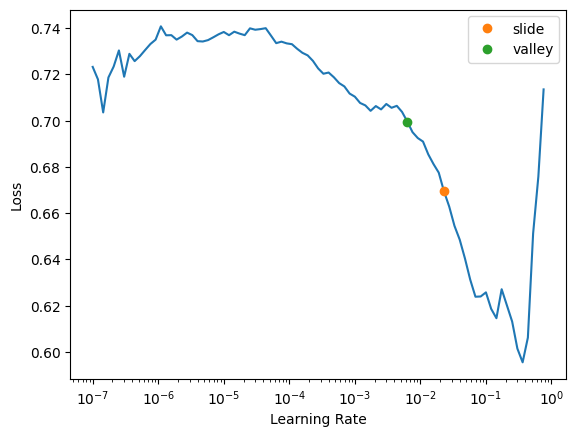

In [23]:
#learn.lr_find()
learn.lr_find(suggest_funcs=(slide,valley))

In [24]:
%%time
learn.fit_one_cycle(2, 1.089e-3)

epoch,train_loss,valid_loss,roc_auc_score,time
0,0.171510,0.165740,0.956829,01:32
1,0.161167,0.160141,0.960077,01:31


CPU times: user 3min 2s, sys: 1.36 s, total: 3min 3s
Wall time: 3min 4s


In [25]:
dl = test_dl

In [26]:
learn.save('nn_pnality_tp_pd')

Path('models/nn_pnality_tp_pd.pth')

In [27]:
nn_preds = learn.get_preds(dl=dl)
nn_preds_x = learn.get_preds()[0]
a_preds, _ = learn.get_preds(dl=dl)
nn_preds_y = a_preds.squeeze(1)
nn_preds_proba = (a_preds[:, 1])

In [28]:
a_preds.shape

torch.Size([250000, 2])

In [29]:
nn_preds_y.shape,sub_df.shape

(torch.Size([250000, 2]), (250000, 2))

In [30]:
nn_preds_x

tensor([[9.9994e-01, 6.2263e-05],
        [8.8136e-01, 1.1864e-01],
        [9.2253e-01, 7.7474e-02],
        ...,
        [9.9818e-01, 1.8206e-03],
        [9.9822e-01, 1.7802e-03],
        [9.9995e-01, 4.8060e-05]])

In [31]:
nn_preds_y

tensor([[9.9429e-01, 5.7107e-03],
        [8.2920e-01, 1.7080e-01],
        [9.9987e-01, 1.3497e-04],
        ...,
        [3.2264e-01, 6.7736e-01],
        [9.9806e-01, 1.9407e-03],
        [8.1271e-01, 1.8729e-01]])

In [32]:
a_preds

tensor([[9.9429e-01, 5.7107e-03],
        [8.2920e-01, 1.7080e-01],
        [9.9987e-01, 1.3497e-04],
        ...,
        [3.2264e-01, 6.7736e-01],
        [9.9806e-01, 1.9407e-03],
        [8.1271e-01, 1.8729e-01]])

In [33]:
nn_preds_proba

tensor([5.7107e-03, 1.7080e-01, 1.3497e-04,  ..., 6.7736e-01, 1.9407e-03,
        1.8729e-01])

In [34]:
#final_preds = torch.round(a_preds).long()
final_preds = a_preds[:,1]
final_preds

tensor([5.7107e-03, 1.7080e-01, 1.3497e-04,  ..., 6.7736e-01, 1.9407e-03,
        1.8729e-01])

In [35]:
final_preds.shape

torch.Size([250000])

In [36]:
!rm submission.csv
sub_df['y'] = final_preds
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

rm: cannot remove 'submission.csv': No such file or directory


,y
id,
750000,0.005711
750001,0.170796
750002,0.000135
750003,0.000043
750004,0.018135
...,...
999995,0.000113
999996,0.114377
999997,0.677360


## Decision Trees

### Random Forests

In [37]:
%%time
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf_model = rf.fit(X_train, y_train);

rf_preds = tensor(rf_model.predict(test_dl.xs))
rf_preds_probs = tensor(rf_model.predict_proba(test_dl.xs))[:, 1]

rf_preds_x = tensor(rf_model.predict(X_test))
rf_preds_proba = tensor(rf_model.predict_proba(X_test))[:, 1]

#mse = mean_absolute_error(y_test, rf_preds_x)
#rmse = np.sqrt(mse)

#accuracy_score(y_test,rf_preds_x)
rf_score = roc_auc_score(y_test,rf_preds_proba)
rf_score

CPU times: user 2min 16s, sys: 274 ms, total: 2min 17s
Wall time: 2min 16s


0.9639973689437652

In [38]:
rf_preds_probs,rf_preds_probs.shape

(tensor([3.7933e-03, 2.2821e-01, 8.0000e-03,  ..., 6.9653e-01, 1.0836e-04,
         3.0403e-02]),
 torch.Size([250000]))

In [39]:
rf_preds_probs 

tensor([3.7933e-03, 2.2821e-01, 8.0000e-03,  ..., 6.9653e-01, 1.0836e-04,
        3.0403e-02])

In [40]:
def rf_feat_importance(m, train_subset):
    return pd.DataFrame({'cols':train_subset.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [41]:
fi = rf_feat_importance(rf_model, X_train)
#fi[:10]

fi

,cols,imp
12,duration,0.469618
10,balance,0.093549
7,month,0.068355
9,age,0.066258
11,day,0.056748
8,poutcome,0.045251
4,housing,0.038034
14,pdays,0.035687
6,contact,0.030368
0,job,0.026447


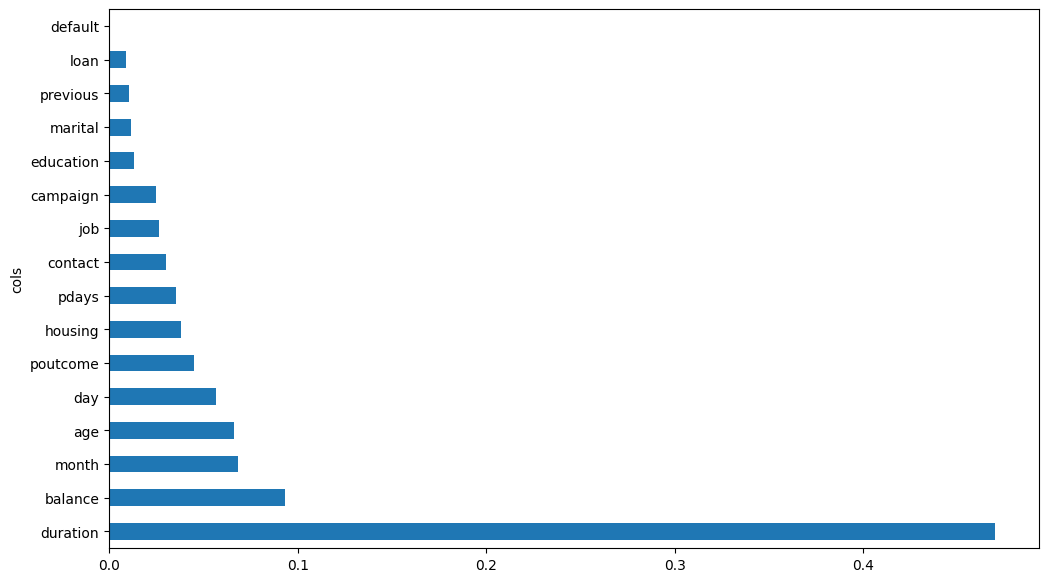

In [42]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

#plot_fi(fi[:30]);
plot_fi(fi);

#### Cross validation - RF

In [43]:
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
rf_oof_predictions, rf_test_predictions, rf_mean_score, rf_fold_scores = cross_val_predict(
    model=rf, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Fold 1 roc_auc: 0.962729
Training fold 2/5...
Fold 2 roc_auc: 0.963630
Training fold 3/5...
Fold 3 roc_auc: 0.963520
Training fold 4/5...
Fold 4 roc_auc: 0.964465
Training fold 5/5...
Fold 5 roc_auc: 0.962614

Mean roc_auc: 0.963392


In [45]:
rf_oof_predictions.shape, rf_test_predictions.shape

((600000,), (150000,))

In [46]:
rf_oof_predictions

array([6.65990236e-01, 3.75000000e-03, 8.66211871e-01, ..., 7.35638219e-03, 7.85898405e-05, 3.65757025e-02])

In [47]:
rf_test_predictions

array([2.27945037e-03, 1.45290753e-01, 5.94953510e-02, ..., 5.42667034e-04, 2.23404167e-05, 0.00000000e+00])

In [48]:
rf_mean_score, rf_fold_scores

(0.963391579082191,
 [0.9627285660840498,
  0.963630279543348,
  0.9635202294838844,
  0.9644651312793462,
  0.9626136890203267])

In [49]:
!rm submission.csv
sub_df['y'] = rf_preds_probs
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.003793
750001,0.228209
750002,0.008000
750003,0.001127
750004,0.025733
...,...
999995,0.000000
999996,0.138380
999997,0.696529


## Gradient Boosting

### XGBoost

In [50]:
%%time
xgb_model = xgb.XGBClassifier()
xgb_model = xgb_model.fit(X_train, y_train)

xgb_preds = tensor(xgb_model.predict(test_dl.xs))
xgb_preds_proba = tensor(xgb_model.predict_proba(test_dl.xs))[:, 1]

xgb_preds_x = tensor(xgb_model.predict(X_test))
xgb_preds_x_proba = tensor(xgb_model.predict_proba(X_test))[:, 1]

xgb_score = roc_auc_score(y_test,xgb_preds_x_proba)
xgb_score

CPU times: user 7.61 s, sys: 36 ms, total: 7.64 s
Wall time: 3.89 s


0.9657571348819762

In [51]:
xgb_preds_proba

tensor([2.5332e-03, 7.0840e-02, 3.0150e-04,  ..., 9.0073e-01, 1.4592e-03,
        1.9997e-01])

#### XGB Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

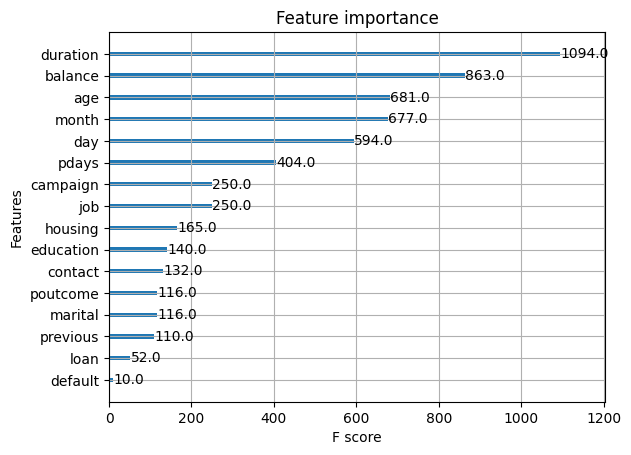

In [52]:
#plot_importance(xgb_model.fit(X_train, y_train))
plot_importance(xgb_model)

#### Cross Validation - XGBoost

In [53]:
xgb_model = xgb.XGBClassifier()
xgb_model

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [54]:
xgb_oof_predictions, xgb_test_predictions, xgb_mean_score, xgb_fold_scores = cross_val_predict(
    model=xgb_model, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Fold 1 roc_auc: 0.965244
Training fold 2/5...
Fold 2 roc_auc: 0.965809
Training fold 3/5...
Fold 3 roc_auc: 0.966006
Training fold 4/5...
Fold 4 roc_auc: 0.967035
Training fold 5/5...
Fold 5 roc_auc: 0.964735

Mean roc_auc: 0.965766


In [55]:
xgb_oof_predictions

array([7.71774292e-01, 2.15967838e-03, 9.03033614e-01, ..., 3.38733429e-04, 1.96737284e-03, 2.68889498e-02])

In [56]:
xgb_test_predictions

array([6.06481350e-04, 5.79907065e-02, 1.07149167e-01, ..., 5.41087313e-04, 8.64496324e-04, 3.11184900e-05])

In [57]:
xgb_mean_score

0.9657657297237894

In [58]:
 xgb_fold_scores

[0.9652440670781343,
 0.9658088903264811,
 0.9660060642911756,
 0.9670349596642202,
 0.964734667258936]

In [59]:
!rm submission.csv
sub_df['y'] = xgb_preds_proba
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.002533
750001,0.070840
750002,0.000301
750003,0.000108
750004,0.044066
...,...
999995,0.000338
999996,0.126290
999997,0.900725


### LGBM

In [60]:
%%time
#ds subset
lgbm_model = lgb.LGBMClassifier()
lgbm_model = lgbm_model.fit(X_train, y_train)

#test set preds
lgbm_preds = tensor(lgbm_model.predict(test_dl.xs))
lgbm_preds_prob = tensor(lgbm_model.predict_proba(test_dl.xs))
lgbm_preds_proba = (lgbm_preds_prob[:, 1])

#validation set preds
lgbm_preds_x = tensor(lgbm_model.predict(X_test))
lgbm_preds_x_prob = tensor(lgbm_model.predict_proba(X_test))
lgbm_positive_preds_x = (lgbm_preds_x_prob[:, 1])

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

#lgb_preds_x_prob = tensor(lgb_model.predict_proba(X_test))

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

[LightGBM] [Info] Number of positive: 72341, number of negative: 527659
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1008
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120568 -> initscore=-1.987059
[LightGBM] [Info] Start training from score -1.987059
CPU times: user 12.6 s, sys: 55.9 ms, total: 12.7 s
Wall time: 6.53 s


0.9647441827201265

In [61]:
lgbm_preds_prob,lgbm_preds_prob.shape

(tensor([[0.9948, 0.0052],
         [0.8758, 0.1242],
         [0.9987, 0.0013],
         ...,
         [0.3664, 0.6336],
         [0.9989, 0.0011],
         [0.9107, 0.0893]]),
 torch.Size([250000, 2]))

#### LGBM Feature Importance

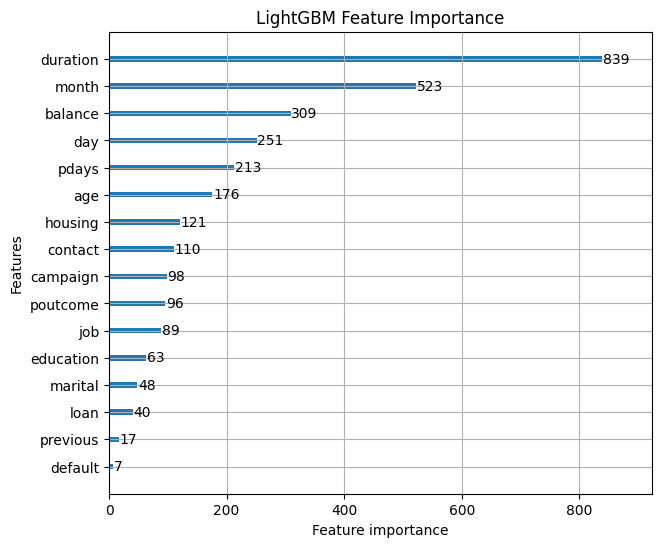

In [62]:
# Plot feature importance without using Gain or split
lgb.plot_importance(lgbm_model, figsize=(7,6), title="LightGBM Feature Importance")
#plt.title('LGBM Feature Importance')
#plt.tight_layout()
plt.show()

#### Cross Validation - LGBM

In [63]:
lgbm_model = lgb.LGBMClassifier()
lgbm_model

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [64]:
lgbm_oof_predictions, lgbm_test_predictions, lgbm_mean_score, lgbm_fold_scores = cross_val_predict(
    model=lgbm_model, X_train=X_train, y_train=y_train, X_test=X_test,
)

Training fold 1/5...
[LightGBM] [Info] Number of positive: 57872, number of negative: 422128
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1008
[LightGBM] [Info] Number of data points in the train set: 480000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120567 -> initscore=-1.987075
[LightGBM] [Info] Start training from score -1.987075
Fold 1 roc_auc: 0.964397
Training fold 2/5...
[LightGBM] [Info] Number of positive: 57873, number of negative: 422127
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points i

In [65]:
lgbm_oof_predictions

array([0.72768981, 0.00205334, 0.82523492, ..., 0.00179693, 0.00555967, 0.15110025])

In [66]:
lgbm_test_predictions

array([0.00172002, 0.07401697, 0.0878557 , ..., 0.00280988, 0.0025894 , 0.0003276 ])

In [67]:
 lgbm_mean_score

0.9646227815838335

In [68]:
lgbm_fold_scores

[0.964397495748652,
 0.9646868527239544,
 0.9646857838475613,
 0.9655464402376381,
 0.9637973353613621]

In [69]:
!rm submission.csv
sub_df['y'] = lgbm_preds_proba
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.005207
750001,0.124177
750002,0.001270
750003,0.000443
750004,0.029560
...,...
999995,0.000451
999996,0.119658
999997,0.633627


### CatBoost

In [70]:
%%time
#using full ds
cat_model = CatBoostClassifier()
cat_model = cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

#test set preds
cat_preds = tensor(cat_model.predict(test_dl.xs))
cat_preds_probs = tensor(cat_model.predict_proba(test_dl.xs))[:, 1]
#cat_preds_final = cat_preds.squeeze(1)

#validation set preds
cat_preds_x = tensor(cat_model.predict(X_test))
cat_preds_x_proba = tensor(cat_model.predict_proba(X_test))[:, 1]

#cat_preds_x_final = cat_preds_x.squeeze(1)

#accuracy_score(y_test,cat_preds_x)

cat_score = roc_auc_score(y_test,cat_preds_x_proba)
cat_score

CPU times: user 3min 57s, sys: 10.2 s, total: 4min 8s
Wall time: 1min 3s


0.9672651875507

#### CatBoost Feature Importance

In [71]:
feature_importance_default = cat_model.get_feature_importance()
feature_names = X_train.columns

# Create DataFrame for better visualization
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance_default
}).sort_values('importance', ascending=False)

print("=== Default Feature Importance (PredictionValuesChange) ===")
print(importance_df.head(10))

=== Default Feature Importance (PredictionValuesChange) ===
     feature  importance
12  duration   45.858856
6    contact   10.999482
7      month    9.924423
10   balance    7.771827
4    housing    5.585268
11       day    4.395307
9        age    2.484486
13  campaign    2.481335
8   poutcome    2.074597
14     pdays    1.951287


#### Cross validation - CatBoost

In [72]:
cat_model = CatBoostClassifier()
cat_model

In [73]:
cat_oof_predictions, cat_test_predictions, cat_mean_score, cat_fold_scores = cross_val_predict(
    model=cat_model, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Learning rate set to 0.143822
0:	learn: 0.4851469	total: 52.8ms	remaining: 52.7s
1:	learn: 0.3665107	total: 101ms	remaining: 50.5s
2:	learn: 0.3024717	total: 150ms	remaining: 49.7s
3:	learn: 0.2646404	total: 200ms	remaining: 49.8s
4:	learn: 0.2409762	total: 246ms	remaining: 49s
5:	learn: 0.2265456	total: 295ms	remaining: 48.8s
6:	learn: 0.2165907	total: 344ms	remaining: 48.8s
7:	learn: 0.2098386	total: 393ms	remaining: 48.7s
8:	learn: 0.2034493	total: 446ms	remaining: 49.1s
9:	learn: 0.1995264	total: 495ms	remaining: 49s
10:	learn: 0.1966364	total: 544ms	remaining: 48.9s
11:	learn: 0.1931837	total: 597ms	remaining: 49.1s
12:	learn: 0.1915078	total: 646ms	remaining: 49.1s
13:	learn: 0.1895760	total: 695ms	remaining: 49s
14:	learn: 0.1880959	total: 746ms	remaining: 49s
15:	learn: 0.1867071	total: 794ms	remaining: 48.9s
16:	learn: 0.1851717	total: 845ms	remaining: 48.9s
17:	learn: 0.1840974	total: 897ms	remaining: 48.9s
18:	learn: 0.1828687	total: 944ms	remaining: 48.

## Ensembling

### Averaging

#### CatBoost + XGBoost

In [74]:
cat_xgb_preds = (xgb_preds_proba + cat_preds_probs)/ 2
cat_xgb_preds 

tensor([3.3183e-03, 8.3179e-02, 2.9314e-04,  ..., 7.0258e-01, 1.1113e-03,
        1.8571e-01])

In [75]:
cat_xgb_x_preds = (xgb_preds_x_proba + cat_preds_x_proba)/ 2
cat_xgb_x_preds 

tensor([4.7237e-04, 4.5439e-02, 9.7293e-02,  ..., 6.9326e-04, 5.0175e-04,
        1.9061e-05])

In [76]:
cat_xgb_score = roc_auc_score(y_test,cat_xgb_x_preds)
cat_xgb_score

0.967281841704559

#### CatBoost + LGBM

In [77]:
cat_lgbm_preds = (lgbm_preds_proba + cat_preds_probs)/ 2
cat_lgbm_preds 

tensor([0.0047, 0.1098, 0.0008,  ..., 0.5690, 0.0009, 0.1304])

In [78]:
cat_lgbm_x_preds = (lgbm_positive_preds_x + cat_preds_x_proba)/ 2
cat_lgbm_x_preds.shape

torch.Size([150000])

In [79]:
cat_lgbm_score = roc_auc_score(y_test,cat_lgbm_x_preds)
cat_lgbm_score

0.9669949996175741

#### XGBoost + LGBM

In [80]:
lgbm_xgb_preds = (lgbm_preds_proba +  xgb_preds_proba)/ 2
lgbm_xgb_preds 

tensor([0.0039, 0.0975, 0.0008,  ..., 0.7672, 0.0013, 0.1446])

In [81]:
lgbm_xgb_preds_x = (lgbm_positive_preds_x + xgb_preds_x_proba)/ 2
lgbm_xgb_score = roc_auc_score(y_test,lgbm_xgb_preds_x)
lgbm_xgb_score

0.9661308315011957

In [82]:
!rm submission.csv
sub_df['y'] = lgbm_xgb_preds 
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.003870
750001,0.097509
750002,0.000786
750003,0.000276
750004,0.036813
...,...
999995,0.000394
999996,0.122974
999997,0.767176


#### CatBoost + LGBM + XGBoost

In [83]:
cat_lgbm_xgb_preds = (lgbm_preds_proba + cat_preds_probs + xgb_preds_proba)/ 3
cat_lgbm_xgb_preds 

tensor([3.9480e-03, 9.6845e-02, 6.1881e-04,  ..., 6.7959e-01, 1.1105e-03,
        1.5357e-01])

In [84]:
cat_lgbm_xgb_preds_x = (lgbm_positive_preds_x + cat_preds_x_proba + xgb_preds_x_proba)/ 3
cat_lgbm_xgb_score = roc_auc_score(y_test,cat_lgbm_xgb_preds_x)
cat_lgbm_xgb_score

0.9671020743045153

## AutoML

### AutoGluon

In [85]:
target = 'y'
eval_metric = 'roc_auc'
#train_data = train
train_data = train_df
#Time_limit = 3600*8
Time_limit = 300
problem_type='binary'

In [86]:
%%time
predictor = TabularPredictor(label=target, eval_metric=eval_metric, verbosity=1).fit(
    train_data, presets='best_quality', time_limit=Time_limit,
    ag_args_fit={'num_gpus': 1}
    #ag_args_fit={
        #'num_gpus': 2, 
        #'stopping_metric': 'log_loss'
    #}
)

results = predictor.fit_summary()

No path specified. Models will be saved in: "AutogluonModels/ag-20250807_122414"
2025-08-07 12:24:15,415	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.8.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-08-07 12:24:18,582	INFO worker.py:1843 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
(_ray_fit pid=725) 1 warning generated.
(_ray_fit pid=725) 1 warning generated.
(_ray_fit pid=725) 1 warning generated.
(_ray_fit pid=725) 1 warning generated.
(_ray_fit pid=725) 1 warning generated.
(_ray_fit pid=725) 1 warning generated.
(_ray_fit pid=725) 1 warning generated.
(_ray_fit pid=725) 1 warning generated.
(_ray_fit pid=725) 1 warning generated.
(_ray_fit pid=725) 1 warning generated.
(_ray_fit pid=725) 1 warning generated.
(_ray_fit pid=725) 1 warning generated.
(_ray_fit pid=725) 1 warning generated.
(_ray_fit pid=725) 1 warning generated.
(_ray_fit pid=725) 1 warning genera

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    LightGBMXT_BAG_L1   0.962355     roc_auc      15.484548  152.583781               15.484548         152.583781            1       True          1
1  WeightedEnsemble_L3   0.962355     roc_auc      15.613325  160.088182                0.128777           7.504401            3       True          4
2  WeightedEnsemble_L2   0.962355     roc_auc      15.621750  152.746563                0.137202           0.162781            2       True          2
3    LightGBMXT_BAG_L2   0.961421     roc_auc      19.205719  224.851799                3.721171          72.268018            2       True          3
Number of models trained: 4
Types of models trained:
{'StackerEnsembleModel_LGB', 'WeightedEnsembleModel'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: True  

In [87]:
%%time
#predictor = TabularPredictor(label=target, eval_metric=eval_metric,verbosity=1,problem_type=problem_type).fit(
    #train_data, presets='best_quality',excluded_model_types=['KNN'], time_limit=Time_limit,
    #ag_args_fit={
        #'num_gpus': 2, 
        #'stopping_metric': 'log_loss'
    #}
#)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


In [88]:
%%time
results = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    LightGBMXT_BAG_L1   0.962355     roc_auc      15.484548  152.583781               15.484548         152.583781            1       True          1
1  WeightedEnsemble_L3   0.962355     roc_auc      15.613325  160.088182                0.128777           7.504401            3       True          4
2  WeightedEnsemble_L2   0.962355     roc_auc      15.621750  152.746563                0.137202           0.162781            2       True          2
3    LightGBMXT_BAG_L2   0.961421     roc_auc      19.205719  224.851799                3.721171          72.268018            2       True          3
Number of models trained: 4
Types of models trained:
{'StackerEnsembleModel_LGB', 'WeightedEnsembleModel'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: True  

In [89]:
%%time
predictor.leaderboard()

CPU times: user 4.6 ms, sys: 1.02 ms, total: 5.62 ms
Wall time: 5.01 ms


,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT_BAG_L1,0.962355,roc_auc,15.484548,152.583781,15.484548,152.583781,1,True,1
1,WeightedEnsemble_L3,0.962355,roc_auc,15.613325,160.088182,0.128777,7.504401,3,True,4
2,WeightedEnsemble_L2,0.962355,roc_auc,15.621750,152.746563,0.137202,0.162781,2,True,2
3,LightGBMXT_BAG_L2,0.961421,roc_auc,19.205719,224.851799,3.721171,72.268018,2,True,3


In [90]:
%%time
#autogluon_preds = predictor.predict(test_df)
autogluon_preds_proba = predictor.predict_proba(test_df)
autogluon_preds_proba.head(5)  

CPU times: user 42.1 s, sys: 30.6 ms, total: 42.2 s
Wall time: 21.4 s


,0,1
id,,
750000,0.991468,0.008532
750001,0.822229,0.177771
750002,0.999105,0.000895
750003,0.999536,0.000464
750004,0.980204,0.019796


In [91]:
predictions = autogluon_preds_proba

In [92]:
%%time
#autogluon_preds = predictor.predict(test_df)
autogluon_preds_proba = predictor.predict_proba(test_df, as_multiclass=False)
autogluon_preds_proba.head(5)  

CPU times: user 42.1 s, sys: 35.4 ms, total: 42.1 s
Wall time: 21.3 s


id
750000    0.008532
750001    0.177771
750002    0.000895
750003    0.000464
750004    0.019796
Name: y, dtype: float32

In [93]:
autogluon_preds_proba.shape, cat_lgbm_xgb_preds.shape

((250000,), torch.Size([250000]))

In [94]:
autogluon_preds_proba.values

array([0.00853225, 0.17777133, 0.00089491, ..., 0.827848  , 0.00205047, 0.12158994], dtype=float32)

In [95]:
!rm submission.csv
sub_df['y'] = autogluon_preds_proba.values
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.008532
750001,0.177771
750002,0.000895
750003,0.000464
750004,0.019796
...,...
999995,0.000568
999996,0.086756
999997,0.827848


In [96]:
#!rm submission.csv
#submission = pd.read_csv(path/'sample_submission.csv')
#submission['y'] = autogluon_preds_proba
#submission.head()
#submission.to_csv(path/'sample_submission.csv', index=False)

In [97]:
#!rm submission.csv
#submit = pd.read_csv(path/'sample_submission.csv')
#predictions = predictions.reset_index(drop=False)
#submit = pd.DataFrame({'id': predictions['id'], 'Personality': predictions['Personality']})
#submit.set_index('id', inplace=True)
#submit.to_csv('submission.csv', index=True)
#sub = pd.read_csv('submission.csv', index_col='id')
#sub

### Ranking

In [98]:
auc_roc_score = pd.DataFrame({
    'algorithm': ['Random Forest','XGBoost','LGBM','CatBoost',
                  'CatBoost_XGB_average','CatBoost_LGBM_average',
                  'XGB_LGBM_average','CatBoost_XGB_LGBM_average',
                  
                 ],
    'auc_roc_score': [rf_score,xgb_score,lgbm_score,cat_score,
                      cat_xgb_score,cat_lgbm_score,lgbm_xgb_score,
                      cat_lgbm_xgb_score,
                 
           ]
})

auc_roc_sorted = auc_roc_score.sort_values(by='auc_roc_score', ascending=False)
auc_roc_sorted

,algorithm,auc_roc_score
4,CatBoost_XGB_average,0.967282
3,CatBoost,0.967265
7,CatBoost_XGB_LGBM_average,0.967102
5,CatBoost_LGBM_average,0.966995
6,XGB_LGBM_average,0.966131
1,XGBoost,0.965757
2,LGBM,0.964744
0,Random Forest,0.963997
